# Переменные окружения

- Переменные окружения, это те переменные которые существуют внутри вашей виртуальной области, и нужны для того чтобы сокрывать секретные данные (TOKEN, API_KEY, SECRET, и т.д.) при выгрузке проекта в репозиторий СУВ(Система управления версий) (GitLab, GitHub, Bitbucket, GitVerse, etc.)


**Все переменные виртуального окружения, обязаны сохраняться внутри .env файла. Также должен быть создан файл .env.example чтобы у стороннего разработчика было понимание того какие переменные используются внутри проекта.**

Для создания правильного формата подгрузки переменных окружения, нам потребуется библиотека pydantic_settings - она нужна для того чтобы валидировать данные из .env файла

Как должно выглядеть содержимое файлов переменных окружения
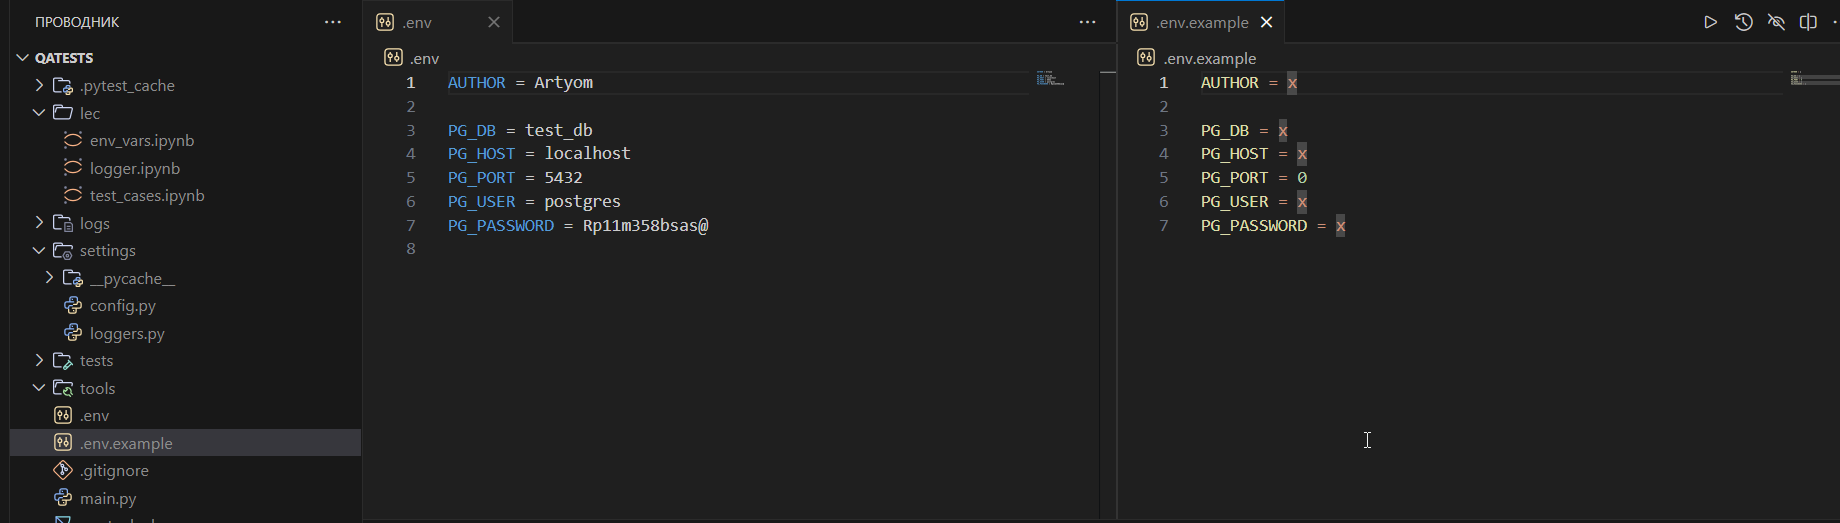

Т.е. .env файл - содержит реальные данные, a .env.example - содержит строки и случайное значение, расходящееся с реальным.

При этом .env файл игнорируется при выгрузке данных на СУВ.

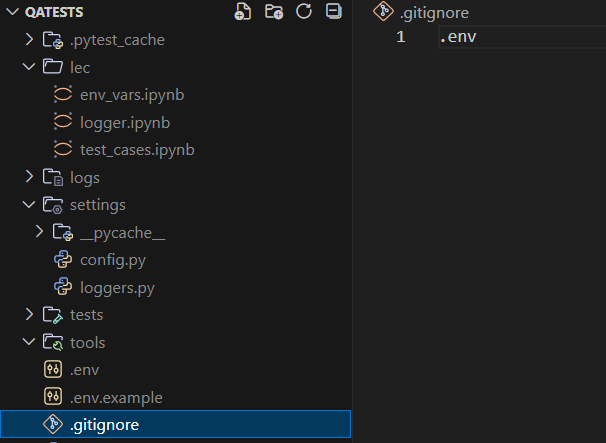

Для выгрузки данных из .env пишется следующий код

In [1]:
# ./settings/config.py
import os
from pydantic_settings import BaseSettings, SettingsConfigDict



class Settings(BaseSettings):
    AUTHOR: str

    PG_DB: str
    PG_HOST: str
    PG_PORT: int
    PG_USER: str
    PG_PASSWORD: str
    
    model_config = SettingsConfigDict(
            env_file = os.path.join(os.path.split(os.path.dirname(__file__))[0], '.env'), 
            env_file_encoding = 'utf-8'
        )
    
settings = Settings()
    

NameError: name '__file__' is not defined

Рассмотрим запись `os.path.join(os.path.split(os.path.dirname(__file__))[0], '.env'), ` в опередлении пути до env файла

- `__file__` - это мета-данные которые есть внутри каждого исполняемого файла, показывают полный путь до файла
- `os.path.dirname(__file__)` - это путь к директории, где находится файл
- `os.path.split(os.path.dirname(__file__))` - это функция, которая разбивает строку на две части: первая часть - это имя директории, вторая часть - это путь до папки в которой хранится папка из первой части
- `os.path.join(os.path.split(os.path.dirname(__file__))[0]` - Берем только первую часть (т.е. путь до проекта)
- `os.path.join()` - это функция, которая объединяет N количество строк в одну, преобразуя их в общий путь до файла




In [3]:
print(__file__)

NameError: name '__file__' is not defined

И теперь можно, использовать переменные окружения через удобную конструкцию settings

In [2]:
# ./main.py
from settings.config import settings

print(settings.AUTHOR)

Artyom
